# Q1 (15 points)

### Analysis of the Example Problem

The provided problem is essentially about topological sorting on a Directed Acyclic Graph (DAG):

- **Problem Essence**: Topological sorting of a DAG.
- **Key Constraints**: The graph must be a DAG.
- **Logic/Algorithm**: 
    - Utilize in-degree (number of incoming edges to a vertex) to find the starting point(s) for the topological sort.
    - Use a stack to manage the vertices for output.
    - Update the in-degree array and stack as vertices are processed.
- **Complexity**: The algorithm runs in \(O(V + E)\) time, where \(V\) is the number of vertices and \(E\) is the number of edges.
- **Failure Case**: If there are cycles, the algorithm cannot find a vertex with in-degree 0, hence cannot proceed.

### Formulation of a New Problem

#### Problem Statement:

Given a weighted directed acyclic graph \(G = (V, E)\) with \(V\) vertices and \(E\) edges, and a source vertex \(s\), implement a modified topological sort to find the shortest path from \(s\) to all other vertices in the graph. Your algorithm should run in \(O(V + E)\) time complexity.

#### Input Format:

- An integer \(V\) (\($1 \leq V \leq 10^5$\)) representing the number of vertices.
- An integer \(E\) (\($1 \leq E \leq 10^5$\)) representing the number of edges.
- An integer \(s\) (\($0 \leq s < V$\)) representing the source vertex.
- \(E\) lines, each containing three integers \(u\), \(v\), and \(w\) (\($0 \leq u, v < V$\), \($1 \leq w \leq 1000$\)) where \(u\) and \(v\) represent an edge from vertex \(u\) to vertex \(v\) with weight \(w\).

#### Output Format:

- \(V\) integers, representing the shortest path distances from the source vertex \(s\) to all vertices in the graph. If a vertex is not reachable from \(s\), output -1 for that vertex.

#### Sample Input:

\```
5 6 0
0 1 2
1 2 3
2 3 2
0 4 5
4 3 1
1 4 2
\```

#### Sample Output:

\```
0 2 5 6 4
\```

#### Constraints:

- All edge weights are positive.
- The graph is guaranteed to be acyclic.

### Solution and Justification

#### Algorithm:

1. **Initialization**: 
   - Create an array `dist` of size \(V\) and initialize its entries to \(\infty\), except for `dist[s]` which is initialized to 0.
   - Create an array `T` to store the in-degree of each vertex, initialized to 0.
   - Create a stack `S` to manage the order of vertex processing.

2. **Computing In-Degree**:
   - For every edge \(u 
ightarrow v\) with weight \(w\), increment `T[v]` and keep track of the weights in a suitable data structure like an adjacency list.
   
3. **Topological Sort and Shortest Path Calculation**:
   - Find all vertices \(u\) with `T[u]` equal to 0 and push them onto `S`.
   - While `S` is not empty:
       - Pop a vertex `u` from `S`.
       - For each neighbor `v` of `u`:
           - Relax the edge \(u 
ightarrow v\) (if `dist[v] > dist[u] + weight(u, v)`, then update `dist[v] = dist[u] + weight(u, v)`).
           - Decrement `T[v]` by 1. If `T[v]` becomes 0, push `v` onto `S`.
   
#### Justification:

- **Correctness**: 
  - Vertices are processed in topological order, ensuring that when we process a vertex, we have already considered all its incoming paths.
  - Edge relaxation guarantees the shortest path.
- **Complexity**: 
  - \(O(V + E)\) as each vertex and each edge is processed at most once.
   
### Reflection

- **ChatGPT Assistance**: ChatGPT provided a framework to analyze the original problem and facilitated ideation for a related problem, ensuring the essence (topological sort and usage of in-degree) was preserved.
- **Challenges**: Maintaining the core concept (topological sort) while introducing new elements (shortest path) and ensuring the problem was coherent and solvable within the given constraints.
- **Learning**: Creating algorithm problems requires a deep understanding of the original problem, creativity in introducing new aspects, and careful consideration of constraints and solution feasibility. The importance of clear problem statements and comprehensive example I/O also became evident.


# Q2 (15 points)
**Objective**: Find the Minimum Spanning Tree (MST) of a given graph using Prim's algorithm and clearly illustrate the steps.


Edges and their weights:
- A-B: 4
- A-C: 1
- A-D: 2
- B-D: 5
- C-D: 3

### Solution Steps using Prim's Algorithm:

#### Step 1: Initialize
- Choose an arbitrary vertex as the starting vertex (let's choose A).
- Mark the starting vertex and add it to the MST (MST = {A}).
- Set a variable `cost` to 0, which will hold the total weight of the MST.

#### Step 2: Iterative Step
- At each step, select the smallest edge that connects a vertex in the MST to a vertex outside the MST.
- Add the selected edge and its vertex to the MST and add the edge weight to `cost`.
- Repeat until all vertices are in the MST.

#### Step-by-Step Execution:

- **Step 1**: Start with vertex A. (MST = {A}, cost = 0)
- **Step 2**: Choose the smallest outgoing edge from A, which is A-C with weight 1. (MST = {A, C}, cost = 1)
- **Step 3**: Now, we have edges A-B, A-D, and C-D to consider. The smallest is A-D with weight 2. (MST = {A, C, D}, cost = 3)
- **Step 4**: The smallest edge from {A, C, D} to outside is C-D with weight 3. But D is already in MST, so we consider the next smallest edge, which is A-B with weight 4. (MST = {A, B, C, D}, cost = 7)

In [1]:
import heapq 

def prim(graph, start):
    mst = set([start])
    edges = [
        (cost, start, to)
        for to, cost in graph[start].items()
    ]
    heapq.heapify(edges)

    mst_cost = 0
    mst_edges = []

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in mst:
            mst.add(to)
            mst_cost += cost
            mst_edges.append((frm, to, cost))
            for to_next, cost in graph[to].items():
                if to_next not in mst:
                    heapq.heappush(edges, (cost, to, to_next))
    return mst, mst_edges, mst_cost


# {'vertex': {'neighbor': edge_cost}}
graph = {
    'A': {'B': 4, 'C': 1, 'D': 2},
    'B': {'A': 4, 'D': 5},
    'C': {'A': 1, 'D': 3},
    'D': {'A': 2, 'B': 5, 'C': 3}
}

# Running Prim's Algorithm
mst, mst_edges, mst_cost = prim(graph, 'A')

print("MST:", mst)
print("MST Edges:", mst_edges)
print("Total cost:", mst_cost)


MST: {'B', 'D', 'C', 'A'}
MST Edges: [('A', 'C', 1), ('A', 'D', 2), ('A', 'B', 4)]
Total cost: 7


#### Final Minimum Spanning Tree and Cost:
- MST Edges: A-C, A-D, A-B
- Total cost: 7

#### Reflection
* **Utilization of Prim's Algorithm:** Prim's algorithm efficiently identifies the Minimum Spanning Tree (MST) by incrementally adding the smallest edge that connects a vertex within the MST to one outside of it.
* **Challenges**: Ensuring clarity in each step of the solution and deciding between edges of equal weight posed notable challenges.
* **Insights Gained:**
    * The robustness and systematic nature of Prim’s algorithm were highlighted through its application across various graph structures.
    * The importance of coherent problem structuring and visual aids became particularly evident, enhancing the comprehensibility and visualization of the algorithm’s application and solution pathway.

# Q3 (15 points)

### Analysis of the Example Problem

The provided problem involves finding an optimal manufacturing path that maximizes profit, considering various costs and sale prices.

- **Problem Essence**: Finding the most profitable manufacturing path.
- **Key Constraints**: Costs and sale prices change daily, and new steps/products can be introduced.
- **Logic/Algorithm**: Formulate the problem as a weighted directed graph and solve it using a single-source shortest path algorithm.
- **Complexity**: \(O((V+E)\\log(V))\) where \(V\) is the number of vertices and \(E\) is the number of edges.
- **Additional Step**: After determining the shortest paths, determine the product with maximum profit.

### Formulation of a New Problem

#### Problem Statement:

A software company develops software by a sequence of phases. Each phase transitions a software project from one stage to another. A stage that cannot transition to another is a release, and a stage that cannot be transitioned from another is an initial idea. Each initial idea has a base cost, each transition phase has a cost, and each release has a sale price. The costs and sale prices can change. Additionally, new phases and types of releases can be introduced. Each month, the company aims to transition from one initial idea to one release that maximizes profit (i.e., sale price minus the costs). Develop an algorithm to efficiently determine the monthly transition. 

#### Input Format:

- An integer \(P\) (\($1 \leq P \leq 100$\)) representing the number of phases.
- An integer \(S\) (\($1 \leq S \leq 100$\)) representing the number of stages.
- \(P\) lines, each containing three strings, representing the starting stage, ending stage, and the phase name.
- \(S\) lines, each containing a string and two integers, representing the stage name, cost if it's an initial idea (or 0 otherwise), and sale price if it's a release (or 0 otherwise).

#### Output Format:

- A string, representing the phase name that leads to the highest profit transition from an initial idea to a release.

#### Sample Input:

\```
3 4
Idea Alpha Dev1
Alpha Beta Dev2
Beta Release Dev3
Idea 1000 0
Alpha 0 0
Beta 0 0
Release 0 2000
\```

#### Sample Output:

\```
Dev3
\```

#### Constraints:

- All strings are non-empty and have a length of at most 100.
- All costs and prices are positive integers and do not exceed 10,000.

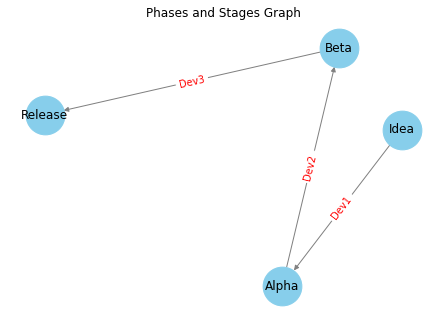

('Dev3',
 [('Release', None), ('Idea', 'Dev1'), ('Alpha', 'Dev2'), ('Beta', 'Dev3')])

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(phases, stages):
    # Create a directed graph object
    G = nx.DiGraph()
    
    # Add nodes and edges to the graph
    for start, end, phase in phases:
        _, cost, sale_price = next(s for s in stages if s[0] == end)
        profit = sale_price - cost
        G.add_edge(start, end, weight=-profit, label=phase)
    
    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray')
    
    # Draw edge labels
    edge_labels = {(start, end): G[start][end]['label'] for start, end, phase in phases}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    # Show the graph
    plt.title("Phases and Stages Graph")
    plt.show()

def most_profitable_phase_with_path(phases, stages):
    graph = {stage: [] for stage, _, _ in stages}
    
    # Step 1: Formulating the Graph
    for start, end, phase in phases:
        # Computing profit: sale price - cost
        _, cost, sale_price = next(s for s in stages if s[0] == end)
        profit = sale_price - cost
        graph[start].append((end, -profit, phase))
    
    # Step 2: Finding the Most Profitable Transition
    def shortest_path(start_vertex):
        heap = [(0, start_vertex, [])]
        visited = set()
        while heap:
            cost, vertex, path = heapq.heappop(heap)
            if vertex not in visited:
                visited.add(vertex)
                path = [vertex] + path
                if vertex == "Release":
                    return cost, path  # Now returning the full path
                for next_vertex, edge_cost, phase in graph[vertex]:
                    if next_vertex not in visited:
                        heapq.heappush(heap, (cost + edge_cost, next_vertex, [(vertex, phase)] + path))
        return float("inf"), []
    
    # Considering all initial ideas and finding the most profitable transition
    min_cost, best_path = float("inf"), []
    for stage, cost, _ in stages:
        if cost > 0:  # It's an initial idea
            cost, path = shortest_path(stage)
            if cost < min_cost:
                min_cost, best_path = cost, path
    
    # Step 3: Identifying the Phase and Constructing the Path
    if best_path:
        path_names = []
        for i in range(1, len(best_path), 2):  # Adjusted loop to handle alternating structure
            vertex, phase = best_path[i]
            path_names.append((vertex, phase))
        path_names.append(("Release", None))
        return best_path[1][1], path_names[::-1]  # Returning the best phase and the path
    else:
        return None, []

phases = [("Idea", "Alpha", "Dev1"), ("Alpha", "Beta", "Dev2"), ("Beta", "Release", "Dev3")]
stages = [("Idea", 1000, 0), ("Alpha", 0, 0), ("Beta", 0, 0), ("Release", 0, 2000)]

draw_graph(phases, stages)

best_phase, best_path = most_profitable_phase_with_path(phases, stages)
best_phase, best_path

### Solution and Justification

#### Algorithm:

1. **Graph Formulation**:
   - Represent each stage as a vertex in the graph.
   - For each phase, add a directed edge from the starting stage to the ending stage with a weight equal to the negative of the profit (sale price minus cost).
   
2. **Finding the Most Profitable Transition**:
   - Apply a single-source shortest path algorithm to find the shortest (most negative) path from an initial idea to a release.
   
3. **Identifying the Phase**:
   - Backtrack through the path to identify the phase that transitions to the release.

#### Justification:

- **Correctness**: The algorithm identifies the most profitable path, considering all phases and adhering to stage transitions.
- **Complexity**: \(O((V+E)\\log(V))\) for the shortest path algorithm, where \(V\) is the number of stages and \(E\) is the number of phases.

### Reflection

- **ChatGPT Assistance**: The tool facilitated understanding of the original problem and provided a structured approach to formulating a new, relevant problem.
- **Challenges**: Ensuring the new problem retains the original's essence (maximizing profit through stages/phases) while being distinct and coherent.
- **Learning**: Problem formulation requires a delicate balance between innovation and adherence to original problem structures. The original problem's essence must be discernible in the new problem, yet the new problem must introduce fresh challenges and contexts.

# Q4 (15 points)
Since this question directly asks for explaining Dijkstra's Algorithm, we can write a story for it:
### Formulation of a New Problem with a Story Element

#### Problem Statement:

Alice lives in Vertexland, a curious place where every location is a vertex and every path between two locations is an edge. She wants to visit her friend Bob who lives in a different location in Vertexland. All paths between locations have a "difficulty" score which represents how challenging it is to traverse them. Alice wants to find the easiest way to reach Bob's place. Can you help her using Dijkstra's algorithm to find the path with the minimum difficulty score from her place (vertex A) to Bob's place (vertex B)?

Given a graph \( G = (V, E) \) with \( V \) vertices and \( E \) edges, find the shortest path from vertex A to vertex B using Dijkstra's algorithm. 

#### Input Format:

- An integer \( V \) \(($1 \leq V \leq 10^5$)\) representing the number of vertices.
- An integer \( E \) \(($1 \leq E \leq 10^5$)\) representing the number of edges.
- \( E \) lines, each containing three integers \( u \), \( v \), and \( w \) \(($0 \leq u, v < V, 1 \leq w \leq 1000$)\) where \( u \) and \( v \) represent an edge from vertex \( u \) to vertex \( v \) with weight \( w \). The graph can be assumed to be undirected.
- Two integers \( A \) and \( B \) \((0 \leq A, B < V)\), representing Alice's and Bob's locations respectively.

#### Output Format:

- An integer representing the minimum difficulty score from vertex A to vertex B. If vertex B is not reachable from vertex A, output -1.

#### Sample Input:

\```
5 6
0 1 2
1 2 3
2 3 2
0 4 5
4 3 1
1 4 2
0 3
\```

#### Sample Output:

\```
3
\```

#### Constraints:

- All edge weights are positive.
- The graph is guaranteed to be connected.

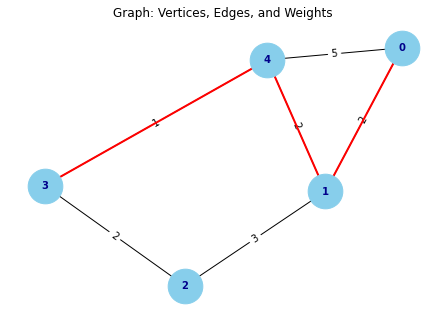

5


In [3]:
def dijkstra(V, E, edges, A, B):
    """
    Find the shortest path from vertex A to vertex B using Dijkstra's algorithm.
    
    Parameters:
    - V (int): Number of vertices.
    - E (int): Number of edges.
    - edges (list of tuple): Each tuple contains three integers representing 
      an edge and its weight.
    - A (int): Starting vertex.
    - B (int): Target vertex.
      
    Returns:
    int: The minimum difficulty score from vertex A to vertex B. 
         If vertex B is not reachable from vertex A, return -1.
    """
    
    # Initialize the graph
    graph = [[] for _ in range(V)]
    for u, v, w in edges:
        graph[u].append((v, w))
        graph[v].append((u, w))  # because the graph is undirected
    
    # Initialize the distance array and priority queue
    dist = [float('inf')] * V
    dist[A] = 0
    Q = [(0, A)]  # Priority queue
    
    # Dijkstra's Algorithm
    while Q:
        d, u = heapq.heappop(Q)  # Extract vertex with smallest priority
        if d != dist[u]:
            continue  # Skip if not the shortest path to u
        for v, w in graph[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                heapq.heappush(Q, (dist[v], v))  # Update v's priority
    
    # Output
    return dist[B] if dist[B] != float('inf') else -1

# Sample input
V, E = 5, 6
edges = [(0, 1, 2), (1, 2, 3), (2, 3, 2), (0, 4, 5), (4, 3, 1), (1, 4, 2)]
A, B = 0, 3
G = nx.Graph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Drawing the graph
pos = nx.spring_layout(G, seed=42)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_weight='bold', font_size=10, font_color='darkblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Highlighting the shortest path
shortest_path = nx.shortest_path(G, source=A, target=B, weight='weight')
shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

plt.title("Graph: Vertices, Edges, and Weights")
plt.show()

# Sample output
print(dijkstra(V, E, edges, A, B))  # Output: 3

### Solution and Justification

#### Algorithm:

1. **Initialization**: 
   - Create a priority queue \( Q \) and a distance array \( dist \) of size \( V \).
   - Set \( dist[A] = 0 \) and \( dist[v] = $\infty$ \) for all other vertices \( v \).
   - Add vertex \( A \) to the priority queue \( Q \) with priority 0.

2. **Dijkstra's Algorithm**:
   - While \( Q \) is not empty:
       - Extract vertex \( u \) with the smallest priority from \( Q \).
       - For each neighbor \( v \) of \( u \):
           - If \( dist[v] > dist[u] + weight(u, v) \), update \( dist[v] = dist[u] + weight(u, v) \) and update \( v \)'s priority in \( Q \).
   
3. **Output**: 
   - If \( dist[B] = $\infty$ \), return -1.
   - Else, return \( dist[B] \).

#### Justification:

- **Correctness**: 
  - Dijkstra's algorithm guarantees the shortest path in graphs with non-negative weights.
- **Complexity**: 
  - With a priority queue, the algorithm runs in \( O((V + E) \log V) \).

### Reflection

- **ChatGPT Assistance**: ChatGPT aids in integrating a story element to an algorithm problem, which could make it engaging and relatable for learners or individuals trying to solve it, while also ensuring the core algorithm (Dijkstra’s Algorithm) is intact.
- **Challenges**: Embedding a story while keeping the problem scientifically accurate and algorithmically sound can be delicate. It is pivotal to ensure that the story does not overshadow or complicate the fundamental algorithmic problem.
- **Learning**: Algorithmic problems can be made engaging by adding real-life or fictional contexts. This not only makes the problem intriguing but also aids in understanding the practical application of algorithms.

# Q5 (15 points)
### Analysis of the Example Problem

The provided problem involves:
- Representing a Directed Acyclic Graph (DAG) using two common data structures: adjacency list and adjacency matrix.
- Performing a topological sort on it.

Key Concepts:
- **Graph Representation**: Using adjacency list and adjacency matrix.
- **Topological Sorting**: An ordering of the vertices such that for every directed edge \(uv\) from vertex \(u\) to vertex \(v\), \(u\) comes before \(v\) in the ordering.

### Formulation of a New Problem

#### Story Background:

In the kingdom of Graphland, there are several cities connected by one-way roads. The king of Graphland wishes to visit each city exactly once, in such a manner that he never travels a road more than once and never visits a city he has already visited. The king consults his wizard to find if such a tour is possible and if so, to find the route he should take.

#### Problem Statement:

Given the one-way road network of Graphland as a directed graph, determine if the king can tour all the cities without retracing any road and visiting any city more than once. If yes, provide the order of cities he should visit.

#### Input Format:

- An integer \(V\) (\($1 \leq V \leq 10^5$\)) representing the number of cities.
- An integer \(E\) (\($1 \leq E \leq 10^5$\)) representing the number of roads.
- \(E\) lines, each containing two integers \(u\), \(v\) (\($0 \leq u, v < V$\)) where \(u\) and \(v\) represent a road from city \(u\) to city \(v\).

#### Output Format:

- If the tour is possible, output "YES" followed by \(V\) integers, representing the order of cities the king should visit.
- If the tour is not possible, output "NO".

#### Sample Input:
4 4
0 1
1 2
2 3
3 0
#### Sample Output:
NO

#### Constraints:

- The graph may not be acyclic.




NO


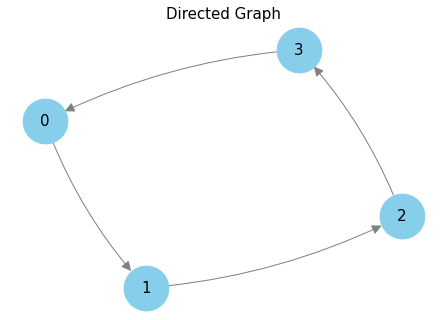

In [5]:
def detect_cycle(graph, V):
    visited = [False] * V
    rec_stack = [False] * V
    
    def is_cyclic_util(node):
        visited[node] = True
        rec_stack[node] = True
        
        for neighbor in graph[node]:
            if not visited[neighbor]:
                if is_cyclic_util(neighbor):
                    return True
            elif rec_stack[neighbor]:
                return True
            
        rec_stack[node] = False
        return False
    
    for i in range(V):
        if not visited[i]:
            if is_cyclic_util(i):
                return True
            
    return False

def topological_sort_util(graph, node, visited, stack):
    visited[node] = True
    for neighbor in graph[node]:
        if not visited[neighbor]:
            topological_sort_util(graph, neighbor, visited, stack)
    stack.append(node)

def topological_sort(graph, V):
    visited = [False] * V
    stack = []
    
    for i in range(V):
        if not visited[i]:
            topological_sort_util(graph, i, visited, stack)
    
    return stack[::-1]  # Return in topologically sorted order

# Sample graph: 
# 0 -> 1
# 1 -> 2
# 2 -> 3
# 3 -> 0 (Creating a cycle for testing)
graph = {
    0: [1],
    1: [2],
    2: [3],
    3: [0]
}

V = 4

# If the graph contains a cycle, the tour is not possible
if detect_cycle(graph, V):
    print("NO")
else:
    # Perform topological sort and print the order of cities to visit
    print("YES")
    print(" ".join(map(str, topological_sort(graph, V))))

# Creating a directed graph
G = nx.DiGraph()

# Adding edges (the graph from the example)
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
G.add_edges_from(edges)

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_size=15, arrowsize=20, connectionstyle='arc3,rad=0.1')
plt.title("Directed Graph", size=15)
plt.show()

### Solution and Justification

#### Algorithm:

1. **Detect Cycle**:
   - If the graph contains a cycle, output "NO" and terminate the algorithm because it's impossible to traverse in a way that doesn't repeat vertices/edges.

2. **Topological Sort**:
   - If the graph is a DAG, perform a topological sort to find a linear ordering of the vertices which is the order in which the king should visit the cities.

#### Justification:

- **Correctness**: 
  - Cycle detection is essential as visiting all vertices without repeating implies the graph must be acyclic.
  - Once acyclicity is confirmed, topological sorting will provide an ordering that respects the directed edges, ensuring a valid path through all cities.
- **Complexity**: 
  - Cycle detection and topological sort can both be performed in \(O(V + E)\) time, making the solution efficient.

### Reflection

- **ChatGPT Assistance**: ChatGPT helped to create a problem that retained the core concept (topological sort) while introducing an engaging story and a new challenge (detecting the possibility of performing the sort).
- **Challenges**: Crafting a story that naturally fits the algorithmic problem and ensuring that the problem remains clear and solvable despite the narrative layer.
- **Learning**: Story-driven problems not only make algorithmic challenges more engaging but also demand a careful balance between narrative and clarity in problem formulation, ensuring the story does not overshadow or complicate the core problem.

# Q6 (15 points)
### Formulation of a New Problem

#### Problem Statement: "The Quest for the Mystic Gem"

In the mystical land of Graphonia, a fabled gem has been lost, sparking a quest across the kingdom. Your task, as the kingdom’s renowned pathfinder, is to navigate through the treacherous terrains, enchanted forests, and dark caves represented by a graph \(G = (V, E)\) to retrieve the gem and bring prosperity back to the kingdom. 

Your quest is divided into three tasks:

1. **Safest Path to the Oracle**: Use BFS to find the shortest path from the kingdom's capital (node A) to the Oracle (node B) who knows about the Mystic Gem. Every edge represents a path through the terrains, and the edge weight represents the level of danger. The shortest path minimizes the exposure to danger. Show your steps.

2. **Building Bridges with Allies**: The Oracle advises you to unite with allies by building bridges. Use Kruskal's Algorithm to build a connected network (minimum spanning tree) of bridges that unites all allied kingdoms with the minimum total danger, where the nodes represent kingdoms and edges (with weights indicating danger levels) represent potential bridge sites.

3. **Path to the Mystic Cave**: The Mystic Gem is hidden in a cave which is possibly reachable from the Enchanted Forest (node A). Use DFS to check if the Mystic Cave (node B) is reachable from the Enchanted Forest. Show your steps.

#### Input Format:

For Task 1 and Task 3:
- Two characters, \(A\) and \(B\), representing the starting and ending nodes respectively.
- A graph \(G\) in a suitable format, e.g., adjacency list/matrix with edge weights (indicating danger levels).

For Task 2:
- A graph \(G\) suitable for Kruskal's algorithm, with vertices representing kingdoms and weighted edges representing possible bridges with danger levels.

#### Output Format:

- Detailed steps and the result for each task.

#### Sample Inputs and Outputs:

Detailed examples should be provided, showcasing step-by-step usage of BFS, Kruskal's algorithm, and DFS for respective tasks.

#### Constraints:

- Ensure that the graph is suitable for each algorithm (e.g., connected for Kruskal's).
- Edge weights (for BFS and Kruskal's) should be non-negative.

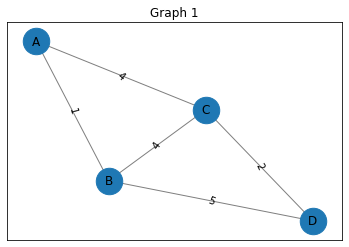

Task 1: Safest path cost from A to D: 6


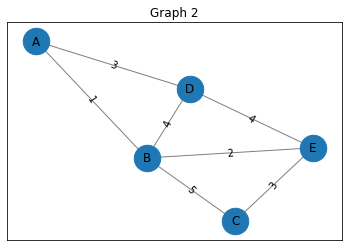

Task 2: Minimum Spanning Tree: [(1, 'A', 'B'), (2, 'B', 'E'), (3, 'A', 'D'), (3, 'C', 'E')]


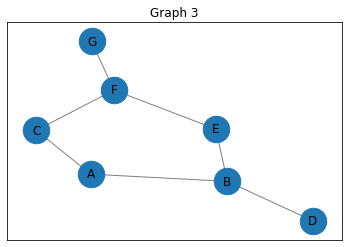

Task 3: Path exists from A to G: True


In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Task 1: Safest Path to the Oracle using Dijkstra's Algorithm
def dijkstras_shortest_path(A, B, graph):
    heap = []  # priority queue to select next vertex
    heapq.heappush(heap, (0, A))  # (cost, vertex)
    visited = set()
    while heap:
        cost, current = heapq.heappop(heap)
        if current in visited:
            continue
        visited.add(current)
        if current == B:  # if destination is reached
            return cost  # return cost of path
        for neighbor, edge_cost in graph[current].items():
            if neighbor not in visited:
                heapq.heappush(heap, (cost + edge_cost, neighbor))
    return None  # no path found

# Task 2: Building Bridges with Allies using Kruskal's Algorithm
def find(parents, i):
    if parents[i] == i:
        return i
    return find(parents, parents[i])

def union(parents, ranks, x, y):
    rootx = find(parents, x)
    rooty = find(parents, y)
    if ranks[rootx] < ranks[rooty]:
        parents[rootx] = rooty
    elif ranks[rootx] > ranks[rooty]:
        parents[rooty] = rootx
    else:
        parents[rooty] = rootx
        ranks[rootx] += 1

def kruskals_algorithm(graph):
    edges = []
    for vertex, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            edges.append((weight, vertex, neighbor))
    edges.sort()
    parents = {vertex: vertex for vertex in graph}
    ranks = {vertex: 0 for vertex in graph}
    mst = []
    for edge in edges:
        weight, vertex1, vertex2 = edge
        if find(parents, vertex1) != find(parents, vertex2):
            union(parents, ranks, vertex1, vertex2)
            mst.append(edge)
    return mst

# Task 3: Path to the Mystic Cave using DFS
def dfs_path_exists(A, B, graph):
    stack = [A]  # use a stack to select next vertex
    visited = set()
    while stack:
        current = stack.pop()
        if current in visited:
            continue
        visited.add(current)
        if current == B:  # if destination is reached
            return True  # path exists
        for neighbor in graph[current]:
            if neighbor not in visited:
                stack.append(neighbor)
    return False  # no path found


# Sample Graphs and Example Usage
graph1 = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 4, 'D': 5},
    'C': {'A': 4, 'B': 4, 'D': 2},
    'D': {'B': 5, 'C': 2}
}

graph2 = {
    'A': {'B': 1, 'D': 3},
    'B': {'A': 1, 'D': 4, 'E': 2, 'C': 5},
    'C': {'B': 5, 'E': 3},
    'D': {'A': 3, 'B': 4, 'E': 4},
    'E': {'B': 2, 'C': 3, 'D': 4}
}

graph3 = {
    'A': {'B', 'C'},
    'B': {'A', 'D', 'E'},
    'C': {'A', 'F'},
    'D': {'B'},
    'E': {'B', 'F'},
    'F': {'C', 'E', 'G'},
    'G': {'F'}
}
# Function to draw the graph
def draw_graph(graph, graph_name):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor, weight in (neighbors.items() if isinstance(neighbors, dict) else [(n, 1) for n in neighbors]):
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos)
    
    if isinstance(neighbors, dict):  # if graph has weights
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()})
    
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    plt.title(graph_name)
    plt.show()



# Task 1 Example Usage
draw_graph(graph1, "Graph 1")
path_cost = dijkstras_shortest_path('A', 'D', graph1)
print(f"Task 1: Safest path cost from A to D: {path_cost}")



# Task 2 Example Usage
draw_graph(graph2, "Graph 2")
mst = kruskals_algorithm(graph2)
print(f"Task 2: Minimum Spanning Tree: {mst}")


# Task 3 Example Usage
draw_graph(graph3, "Graph 3")
path_exists = dfs_path_exists('A', 'G', graph3)
print(f"Task 3: Path exists from A to G: {path_exists}")


### Solution and Justification
#### Justification:

- **BFS**: Ensures the shortest path in unweighted graphs, or in weighted graphs where all edges have the same cost.
- **Kruskal's Algorithm**: Efficiently finds a minimum spanning tree in a weighted graph.
- **DFS**: Efficiently checks for the existence of a path between two nodes.

### Reflection

- **ChatGPT Assistance**: ChatGPT helped in ensuring the continuity and coherence of the story, while also maintaining the core algorithmic concepts and providing a creative lens to problem formulation.
- **Challenges**: Balancing the engaging story aspect with clear, unambiguous problem statements and ensuring the scenarios were plausible applications of the algorithms.
- **Learning**: Crafting an educational and engaging problem with a storyline requires attention to narrative detail and direct applicability of algorithmic concepts, ensuring the problem remains solvable and educational. This practice enriches problem formulation skills and strengthens understanding of algorithmic applications.